Trending YouTube Video Statistics Analysis Para Francia G02

Objetivo
Desarrollar una propuesta de análisis y analítica a partir de un conjunto de datos, aplicando lametodología CRISP-DM

LIMPIEZA DE DATOS

1. Los datos de cada país se encuentran en archivos individuales en formato CSV y la descripciónde sus categorías en un archivo de tipo JSON

2. Este conjunto de datos, ha sido modificado incorporándole cuatro nuevas columnas:

    • state

    • lat

    • lon

    • geometry

3. Se debe comprender el negocio y realizar la inspeccion de los datos, verificar su calidad, limpiar los datos y preprocesar los datos.

4. El dataset limpio estara dentro de la carpeta 'data' llamado 'clean_FR.csv'

PREGUNTAS A RESPONDER

POR CATEGORIA DE VIDEO
1. ¿Qué categorías de videos son las de mayor tendencia?
2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?
3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?
4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

POR EL TIEMPO TRANSCURRIDO

5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

POR CANALES DE YOUTUBE

6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

POR GEOGRAFIA DEL PAIS

7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

ADICIONALMENTE AL CLIENTE LE GUSTARIA CONOCER

8. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?
9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

LIMPIEZA DE DATOS CODIGO

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#Importar data

FR_df=pd.read_csv("FRvideos_cc50_202101.csv")

In [4]:
#Importar el json y extraer la data que nos interesa
import json
FR_category={}
with open("FR_category_id.json") as f:
    FR_data=json.load(f)
for i in list(pd.DataFrame(FR_data['items']).id.values):
    FR_category[i]=pd.DataFrame(FR_data['items'])[pd.DataFrame(FR_data['items']).id==i].snippet.values[0]['title']

In [5]:
#vemos la informacion de toda la informacion de las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [6]:
FR_df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
3281,_VXs7NSl96o,17.30.11,Gauvain Sers - Dans mes poches (En attendant le clip),GauvainSersVEVO,10,2017-11-29T16:00:06.000Z,"gauvain sers""|""renaud""|""chanson""|""dans mes poches""|""clip""|""pourvu""|""casquette""|""creuse""|""video""|""nouvel album""|""chanson a texte""|""chanson francaise""|""amelie poulain""|""jeunet",3859,194,4,13,https://i.ytimg.com/vi/_VXs7NSl96o/default.jpg,False,False,False,PREMIER ALBUM DISPONIBLE : https://GauvainSers.lnk.to/PourvuAlbum \n\nGauvain Sers en concert \nToutes les dates sur le site & réseaux: \nhttp://www.gauvainsers.com \nhttp://www.facebook.com/gauvainsers \nhttp://www.twitter.com/gauvainsers \nhttp://www.instagram.com/gauvainsers \n\nTOUR : Limouzart Productions - bertrand@limouzart.com - http://www.limouzart.com \nMANAGEMENT : Bellevue Music - contact@bellevuemusic.net - http://www.bellevuemusic.net\n\nMusic video by Gauvain Sers performing Dans mes poches. (C) 2017 Mercury Music Group\n\nhttp://vevo.ly/6MrmU8,Nord Pas De Calais,50.283325,2.783334,POINT (2.783333698 50.28332481)
1234,J7zof4I8Wx4,17.20.11,Sarounette : RANGER SA CHAMBRE,Sarounette *,10,2017-11-19T08:35:11.000Z,"sarounette""|""ranger sa chambre""|""comptines""|""ludique""|""chanteuse pour enfants""|""anne sylvaistre""|""henry dès",10376,144,67,0,https://i.ytimg.com/vi/J7zof4I8Wx4/default.jpg,True,False,False,"PAROLE DE LA CHANSON RANGER SA CHAMBRE :\n\nMes enfants quel est ce désordre ?\nTout est sorti et tout déborde\nCette chambre c’est le far West\nMais ou est passé ta veste ?!\n\nRemettez tout dans les placards\nRefaites les lits et les tiroirs\nVous êtes des chenapans\nMais faites plaisir à Maman\n\nRefrain :\nEt 1 et 2 et 3 et 4 Je veux que l’on m’épate\nEt 5 et 6 et 7 et 8 Que vous rangiez très vite\nEt 9 et 10 et 11 et 12 il faut que tout le monde bouge\nVous avez enfin terminé ? C’est l’heure du goûter ! \n\n\nMais c'est magnifique, super, c'est extraordinaire !!! Mais??\n\nMais que vois-je là petits brigands\nTout est caché sous le divan\nVous vous êtes moqués de moi\nLa c’est sûr vous êtes les rois\n\nPromis si vous vous dépêchez\nVous aurez droit a un bon gouter\nAvec des œufs pleins de surprises\nEt des escargots en réglisse\n\n\nRefrain :\nEt 1 et 2 et 3 et 4 Je veux que l’on m’épate\nEt 5 et 6 et 7 et 8 Que vous rangiez très vite\nEt 9 et 10 et 11 et 12 il faut que tout le monde bouge\nVous avez enfin terminé ? C’est l’heure du gouter !! \n\nRefrain :\nEt 1 et 2 et 3 et 4 Je veux que l’on m’épate\nEt 5 et 6 et 7 et 8 Que vous rangiez très vite\nEt 9 et 10 et 11 et 12 il faut que tout le monde bouge\nVous avez enfin terminé ? C’est l’heure du gouter !! Ouéééé\n\nPour nous suivre : \n\nFacebook : page sarounette\n\nInstagram : sarounette_chansons\n\nContact : sarounette.contact@gmail.com",Lorraine,48.683681,6.200024,POINT (6.200024372 48.68368085)
27813,pLj5xMCDYx8,18.04.04,"Barbara détruit Abdel - Blanche jette son alliance, les photos avec Nicolas à la poubelle",Samia & Nouveautés,22,2018-04-03T16:00:05.000Z,"Plus belle la vie""|""PBLV""|""Plus belle la vie spoilers""|""Intrigues""|""Actu""|""Spoilers""|""en avance""|""résumé""|""Nouveautés",2838,9,2,0,https://i.ytimg.com/vi/pLj5xMCDYx8/default.jpg,False,False,False,"Découvrez le résumé détaillé de Plus belle la vie du jeudi 5 avril 2018\n\n★ Veuillez aimer, commenter et vous inscrire!\n\nhttps://twitter.com/pblvofficiel \nhttps://www.facebook.com/plusbellelavie \nhttps://www.instagram.com/pblvofficiel \nRetrouvez les épisodes en exclusivité sur https://pluzzvad.francetv.fr/\n\nLa source & Read more at:\n★http://www.pblv-plusbellelavie.fr\n★http://www.nouveautes-tele.com/\n★https://www.telestar.fr/\n★http://www.toutelatele.com/\n(Thanks To The Writers For Their Hard Work) \n\nTrack: Different Heaven - Nekozilla [NCS Release]\nMusic provide

In [7]:
#valores nulos en cada columna
FR_df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [8]:
#Analizando  la media, moda,desv estandar, etc.
FR_df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04,40724.000000,40724.000000
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03,36.986535,-2.314779
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04,19.889834,25.443453
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-21.033511,-61.532999
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01,42.699989,-0.530030
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02,45.899975,2.666648
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02,48.516663,6.030009
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06,50.283325,55.712816


In [9]:

#analizando valores atipicos
columns_to_plot = ['category_id','views', 'likes', 'dislikes', 'comment_count','lat','lon']
Q1 = FR_df[columns_to_plot].quantile(0.25)
Q3 = FR_df[columns_to_plot].quantile(0.75)
IQR = Q3 - Q1

outliers = ((FR_df[columns_to_plot] < (Q1 - 1.5 * IQR)) | (FR_df[columns_to_plot] > (Q3 + 1.5 * IQR)))
outliers.sum()


category_id      2931
views            5163
likes            5695
dislikes         5174
comment_count    5078
lat              8671
lon              8671
dtype: int64

In [10]:
#Analizando los tipos de datos
FR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [11]:
#Obtener la cantidad de filas duplicadas del dataframe
FR_df[FR_df.duplicated()].shape[0]

0

In [12]:
#Verificamos si los comentarios estan desabilitados para ciertos videos
FR_df.comments_disabled.value_counts()

comments_disabled
False    39835
True       889
Name: count, dtype: int64

In [13]:
#Verificamos si los likes estan  desabilitados para ciertos videos
FR_df.ratings_disabled.value_counts()

ratings_disabled
False    40020
True       704
Name: count, dtype: int64

In [14]:
#Veremos si los videos tuvieron un error o han sido removidos 
FR_df.video_error_or_removed.value_counts()

video_error_or_removed
False    40702
True        22
Name: count, dtype: int64

Problemas Reportados 


1. El tipo de data de category_id debe ser objeto y no entero.

2. La tipo de dato de trending_date y publish_time deben ser datetime en ves de object.

3. Hay datos atipicos, sin embargo los que pueden afectar nuestros resultados son  views, likes, 
dislikes, comment_count, por lo que hay que aplicarles una tranformacion.

4. Hay columnas Inecesarias 'thumbnail_link','tags', 'description'

Consideraciones 

1. La unica columna con valores NA es description

2. No hay columnas duplicadas.

3. Hay videoos removidos, likes desabilitados y comentarios desabilitados, los cuales hay que tomar en consideracion al momento de realizar el analisis.

4. No hay datos vacios



DATA CLEANING


Creando el nuevo Dataset y eliminando las columnas innecesarias

In [15]:
#Crear el dataset de francia para realizar la limpieza
copy_FR=FR_df.copy()

In [16]:
#Eliminar columnas innecesarias
copy_FR.drop(['thumbnail_link','tags','tags','description'],axis=1,inplace=True)


In [17]:
#Haciendo una prueba para ver si las columnas fueron eliminadas satisfactoriamente
for i in ['thumbnail_link','tags', 'description']:
    if i in copy_FR.columns:
        print("wrong")
  

Cambiar category id de int a object para que sea un categorico nominal y se nos facilite trabajar con futuras bibliotecas.

In [18]:
copy_FR['category_id'] = copy_FR['category_id'].astype(str)


In [19]:
#Verificamos si el cambio se realizo de manera correcta 
copy_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  object 
 5   publish_time            40724 non-null  object 
 6   views                   40724 non-null  int64  
 7   likes                   40724 non-null  int64  
 8   dislikes                40724 non-null  int64  
 9   comment_count           40724 non-null  int64  
 10  comments_disabled       40724 non-null  bool   
 11  ratings_disabled        40724 non-null  bool   
 12  video_error_or_removed  40724 non-null  bool   
 13  state                   40724 non-null  object 
 14  lat                     40724 non-null

Cambiando los tipos de datos de trending date y publish time al formato de Datetime


In [20]:
copy_FR['trending_date'] = pd.to_datetime(copy_FR['trending_date'], format='%y.%d.%m', errors='coerce')


In [21]:
copy_FR['year'] = copy_FR['trending_date'].dt.year
copy_FR['month'] = copy_FR['trending_date'].dt.month
copy_FR['day'] = copy_FR['trending_date'].dt.day


In [22]:
#Convertir la columna 'trending_date' date a datetime
copy_FR['trending_date'] = pd.to_datetime(copy_FR[['year', 'month', 'day']], errors='coerce')


In [23]:
# Convierte la columna 'publish_time' al formato de datetime
copy_FR['publish_time'] = pd.to_datetime(copy_FR['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')



In [24]:
#Verificamos el resultado de 'trending_date'
copy_FR.trending_date.sample(10)

27105   2018-04-01
33776   2018-05-10
4899    2017-12-08
23429   2018-03-13
7500    2017-12-21
8683    2017-12-27
21883   2018-03-05
18369   2018-02-16
28530   2018-04-14
13097   2018-01-20
Name: trending_date, dtype: datetime64[ns]

In [25]:
#verificamos el resultado de 'publish_time'
copy_FR.publish_time.sample(10)

33329   2018-05-05 18:54:28
28510   2018-04-11 15:30:00
35413   2018-05-17 11:20:39
25385   2018-03-21 17:00:01
14644   2018-01-27 18:59:28
14938   2018-01-28 10:18:13
6587    2017-12-15 17:12:57
32084   2018-04-29 11:04:36
17857   2018-02-12 10:44:17
40311   2018-06-10 19:12:46
Name: publish_time, dtype: datetime64[ns]

Aplicando tranformacion logaritmica para evitar sesgos en las columnas de views, likes , dislikes y comment count.

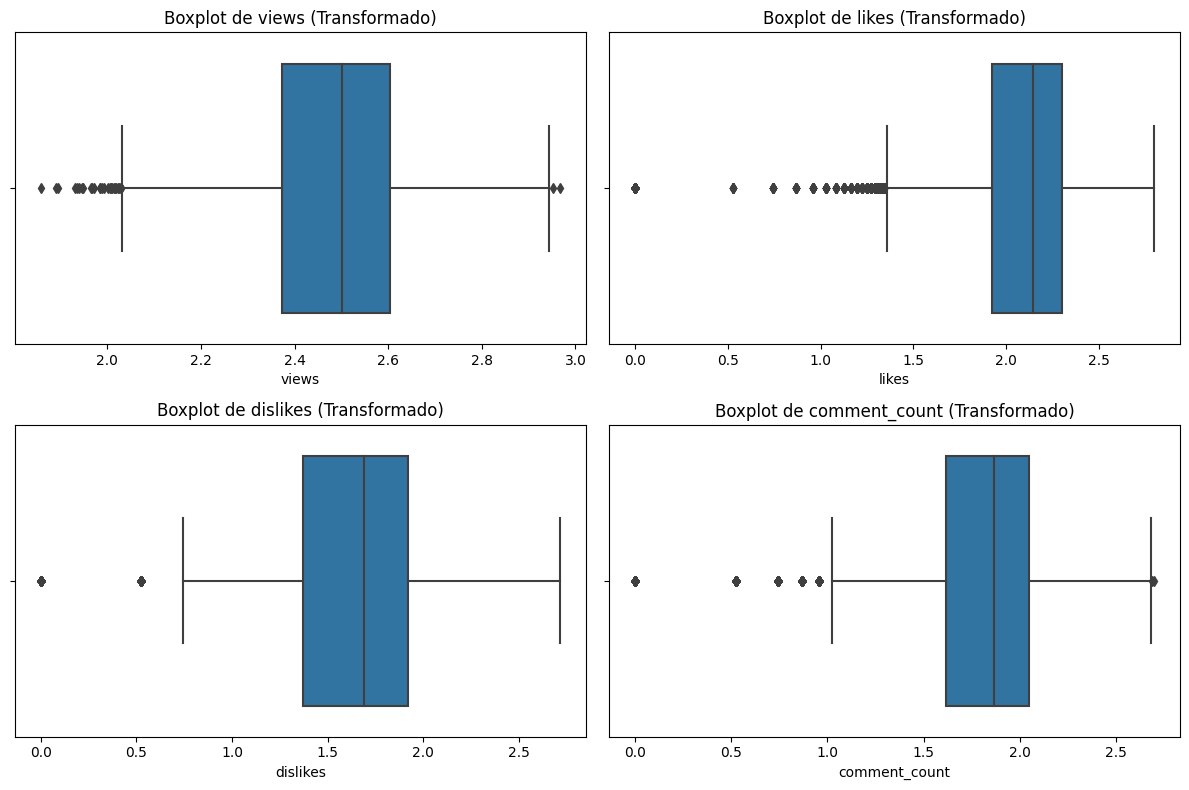

In [26]:
# Lista de columnas para aplicar la transformación logarítmica
columns_to_transform = ['views', 'likes', 'dislikes', 'comment_count']

# Aplicar logaritmo a las columnas seleccionadas
copy_FR[columns_to_transform] = np.log1p(copy_FR[columns_to_transform])

# Crea subgráficos para cada columna transformada
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=np.log1p(copy_FR[column]))  # Aplica la transformación logarítmica aquí
    plt.title(f'Boxplot de {column} (Transformado)')

plt.tight_layout()
plt.show()

In [27]:
#Hacemos una prueba para visualizar si se ha realizado de manera correcta.
columnas_interesantes = ['views', 'likes', 'dislikes', 'comment_count']

# Utiliza el método sample para obtener una muestra aleatoria
muestra_aleatoria = copy_FR[columnas_interesantes].sample(3)

# Imprime la muestra
print(muestra_aleatoria)




           views      likes  dislikes  comment_count
34779   8.252446   3.713572  0.693147       1.945910
16884   8.994545   6.902743  2.302585       5.159055
11440  13.768116  11.412751  7.224753       8.907883


Paso Final: Guardar la Data

In [28]:
#Guardar el archivo
copy_FR.reset_index(drop=True)
copy_FR.to_csv('clean_FR.csv')

In [29]:
#Cargar data
clean_FR=pd.read_csv('clean_FR.csv')
clean_FR.drop('Unnamed: 0', axis=1, inplace=True)
clean_FR.publish_time=clean_FR.publish_time.astype('datetime64[ns]') 
clean_FR.trending_date=clean_FR.trending_date.astype('datetime64[ns]') 

In [30]:
clean_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40724 non-null  object        
 1   trending_date           40724 non-null  datetime64[ns]
 2   title                   40724 non-null  object        
 3   channel_title           40724 non-null  object        
 4   category_id             40724 non-null  int64         
 5   publish_time            40724 non-null  datetime64[ns]
 6   views                   40724 non-null  float64       
 7   likes                   40724 non-null  float64       
 8   dislikes                40724 non-null  float64       
 9   comment_count           40724 non-null  float64       
 10  comments_disabled       40724 non-null  bool          
 11  ratings_disabled        40724 non-null  bool          
 12  video_error_or_removed  40724 non-null  bool  

1. ¿Qué categorías de videos son las de mayor tendencia?


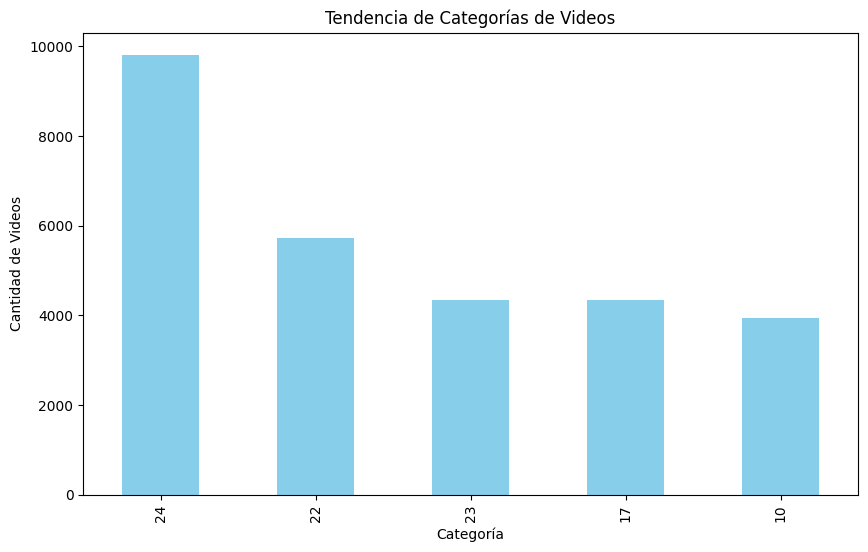

In [46]:
tendencia=clean_FR.groupby('category_id')['views'].count().sort_values(ascending=False).head()
plt.figure(figsize=(10, 6))
tendencia.plot(kind='bar', color='skyblue')
plt.title('Tendencia de Categorías de Videos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Videos')
plt.show()


2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?


<Figure size 1200x400 with 0 Axes>

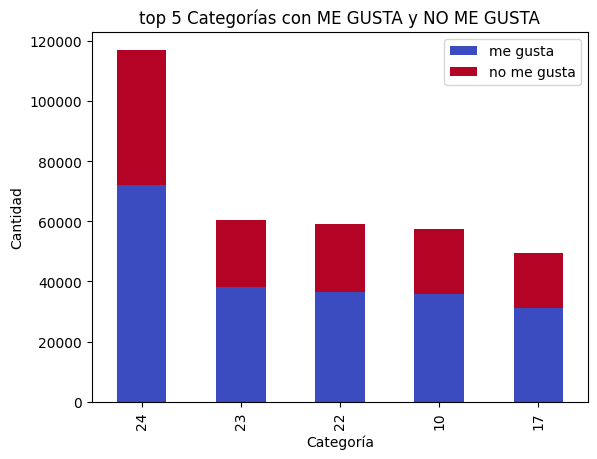

In [56]:
gustan=clean_FR.groupby('category_id')['likes'].sum().sort_values(ascending=False).head()
disgustan=clean_FR.groupby('category_id')['dislikes'].sum().sort_values(ascending=False).head()

combined_data = pd.concat([gustan, disgustan], axis=1)
combined_data.columns = ['me gusta', 'no me gusta']

plt.figure(figsize=(12, 4))
combined_data.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('top 5 Categorías con ME GUSTA y NO ME GUSTA')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?


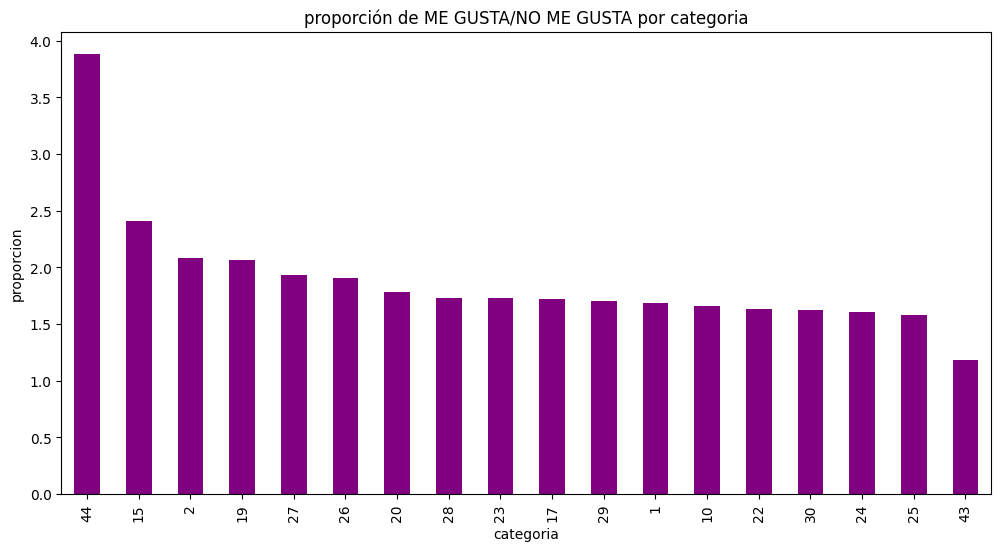

In [52]:
proporciones = clean_FR.groupby('category_id')[['likes', 'dislikes']].sum()

# Calcular la proporción de "Me gusta" / "No me gusta"
proporciones['ratio'] = proporciones['likes'] / proporciones['dislikes']
proporciones = proporciones['ratio'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
proporciones.plot(kind='bar', color='purple')
plt.title('proporción de ME GUSTA/NO ME GUSTA por categoria')
plt.xlabel('categoria')
plt.ylabel('proporcion')
plt.show()

4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

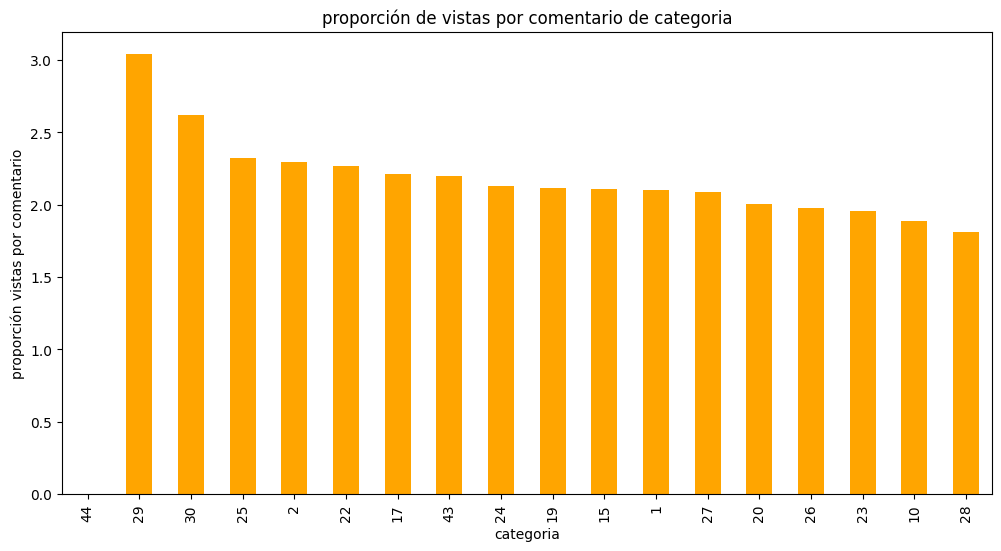

In [61]:

categorias_vistaxcomentario = clean_FR.groupby('category_id')[['views', 'comment_count']].sum()
categorias_vistaxcomentario['proporcion_views_comm'] = categorias_vistaxcomentario['views'] / categorias_vistaxcomentario['comment_count']

proporcion_sorted = categorias_vistaxcomentario['proporcion_views_comm'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
proporcion_sorted.plot(kind='bar', color='orange')
plt.title('proporción de vistas por comentario de categoria')
plt.xlabel('categoria')
plt.ylabel('proporción vistas por comentario')
plt.show()


5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?









6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?


7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?


8. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?


9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

In [35]:
FR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null